# Анализ качества работы нейронной сети для распознавание моделей одежды в Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://www.asozykin.ru/courses/nnpython)".

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [2]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Список с названиями классов

In [3]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

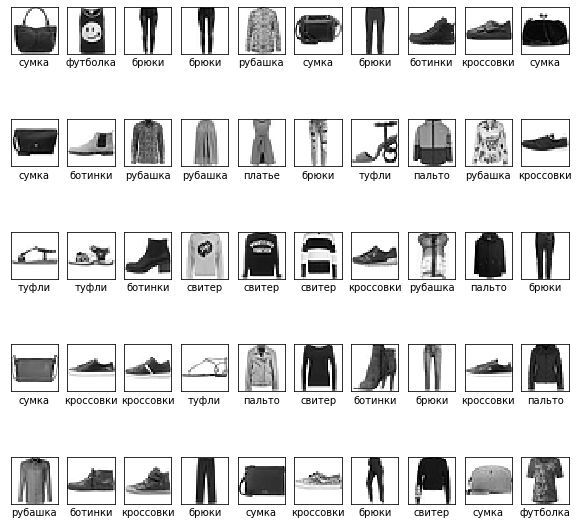

In [4]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

**Нормализация данных**

In [6]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255 
x_test = x_test / 255 

**Работа с правильными ответами**

In [7]:
n = 0

In [8]:
print(y_train[n])

9


**Преобразуем метки в формат one hot encoding**

In [9]:
y_train = utils.to_categorical(y_train, 10)

In [10]:
y_test = utils.to_categorical(y_test, 10)

**Правильный ответ в формате one hot encoding**

In [11]:
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [12]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [13]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [14]:
history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
240/240 [==============================] - 2s 7ms/step - loss: 1.1896 - accuracy: 0.6562 - val_loss: 0.8358 - val_accuracy: 0.7434
Epoch 2/100
240/240 [==============================] - 1s 6ms/step - loss: 0.7631 - accuracy: 0.7628 - val_loss: 0.6971 - val_accuracy: 0.7771
Epoch 3/100
240/240 [==============================] - 1s 6ms/step - loss: 0.6665 - accuracy: 0.7897 - val_loss: 0.6303 - val_accuracy: 0.7985
Epoch 4/100
240/240 [==============================] - 1s 6ms/step - loss: 0.6143 - accuracy: 0.8043 - val_loss: 0.5939 - val_accuracy: 0.8074
Epoch 5/100
240/240 [==============================] - 2s 6ms/step - loss: 0.5802 - accuracy: 0.8131 - val_loss: 0.5659 - val_accuracy: 0.8161
Epoch 6/100
240/240 [==============================] - 1s 6ms/step - loss: 0.5554 - accuracy: 0.8183 - val_loss: 0.5451 - val_accuracy: 0.8199
Epoch 7/100
240/240 [==============================] - 1s 6ms/step - loss: 0.5361 - accuracy: 0.8237 - val_loss: 0.5284 - val_accuracy: 0.8227

Epoch 58/100
240/240 [==============================] - 2s 7ms/step - loss: 0.3594 - accuracy: 0.8761 - val_loss: 0.3810 - val_accuracy: 0.8673
Epoch 59/100
240/240 [==============================] - 2s 7ms/step - loss: 0.3583 - accuracy: 0.8763 - val_loss: 0.3804 - val_accuracy: 0.8683
Epoch 60/100
240/240 [==============================] - 2s 7ms/step - loss: 0.3573 - accuracy: 0.8762 - val_loss: 0.3827 - val_accuracy: 0.8650
Epoch 61/100
240/240 [==============================] - 2s 7ms/step - loss: 0.3557 - accuracy: 0.8771 - val_loss: 0.3816 - val_accuracy: 0.8681
Epoch 62/100
240/240 [==============================] - 2s 7ms/step - loss: 0.3545 - accuracy: 0.8780 - val_loss: 0.3791 - val_accuracy: 0.8658
Epoch 63/100
240/240 [==============================] - 2s 7ms/step - loss: 0.3529 - accuracy: 0.8781 - val_loss: 0.3809 - val_accuracy: 0.8684
Epoch 64/100
240/240 [==============================] - 2s 7ms/step - loss: 0.3519 - accuracy: 0.8785 - val_loss: 0.3754 - val_accuracy:

In [35]:
type(history)

tensorflow.python.keras.callbacks.History

In [37]:
help(history)

Help on History in module tensorflow.python.keras.callbacks object:

class History(Callback)
 |  Callback that records events into a `History` object.
 |  
 |  This callback is automatically applied to
 |  every Keras model. The `History` object
 |  gets returned by the `fit` method of models.
 |  
 |  Method resolution order:
 |      History
 |      Callback
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  on_epoch_end(self, epoch, logs=None)
 |      Called at the end of an epoch.
 |      
 |      Subclasses should override for any actions to run. This function should only
 |      be called during TRAIN mode.
 |      
 |      Arguments:
 |          epoch: integer, index of epoch.
 |          logs: dict, metric results for this training epoch, and for the
 |            validation epoch if validation is performed. Validation result keys
 |            are prefixed with `val_`.
 |

In [44]:
print(history.__weakref__)

None


In [41]:
history.__dict__.keys()

dict_keys(['validation_data', 'model', '_chief_worker_only', 'history', 'params', 'epoch'])

In [51]:
history.__dict__['history'].keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Loss evolution')

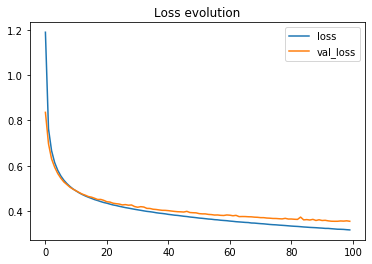

In [71]:
plt.plot(history.__dict__['history']['loss'], label = "loss")
plt.plot(history.__dict__['history']['val_loss'], label = "val_loss")
plt.legend()
plt.title("Loss evolution")

Text(0.5, 1.0, 'Accuracy evolution')

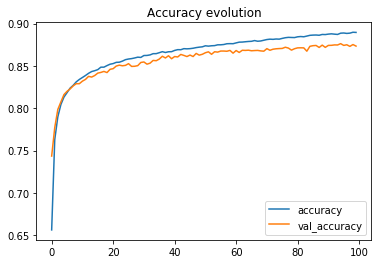

In [72]:
plt.plot(history.__dict__['history']['accuracy'], label = "accuracy")
plt.plot(history.__dict__['history']['val_accuracy'], label = "val_accuracy")
plt.legend()
plt.title("Accuracy evolution")

Text(0.5, 1.0, 'Metrics difference evolution')

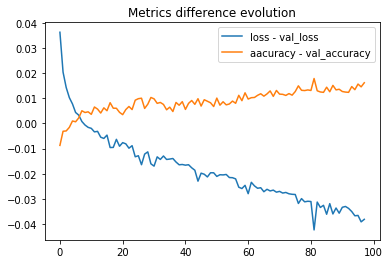

In [81]:
n = 2   # cut from starting point
plt.plot(np.array(history.__dict__['history']['loss'])[n:] - np.array(history.__dict__['history']['val_loss'])[n:],
         label = "loss - val_loss")
plt.plot(np.array(history.__dict__['history']['accuracy'])[n:] - np.array(history.__dict__['history']['val_accuracy'])[n:], 
         label = "aacuracy - val_accuracy")
plt.legend()
plt.title("Metrics difference evolution")

## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [15]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3801 - accuracy: 0.8652


In [18]:
type(scores), len(scores)

(list, 2)

In [19]:
scores

[0.3801423907279968, 0.8651999831199646]

In [20]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 86.52


## Используем сеть для распознавания предметов одежды

In [21]:
n_rec = 495

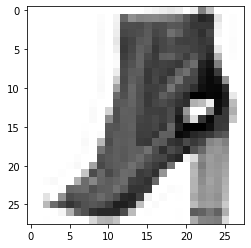

In [22]:
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Меняем размерность изображения и нормализуем его**

In [23]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

In [27]:
x_test[n_rec].shape

(784,)

In [28]:
x.shape

(1, 784)

**Запускаем распознавание**

In [29]:
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [30]:
prediction

array([[1.7281425e-05, 2.5502396e-07, 1.7142780e-06, 1.4171059e-06,
        2.8824770e-08, 4.4785306e-02, 4.0511168e-06, 4.7118915e-04,
        1.0250445e-05, 9.5470846e-01]], dtype=float32)

In [34]:
model.predict(x)

array([[1.7281425e-05, 2.5502396e-07, 1.7142780e-06, 1.4171059e-06,
        2.8824770e-08, 4.4785306e-02, 4.0511168e-06, 4.7118915e-04,
        1.0250445e-05, 9.5470846e-01]], dtype=float32)

**Преобразуем результаты из формата one hot encoding**

In [31]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 9
Название класса: ботинки


**Печатаем правильный ответ**

In [32]:
label = np.argmax(y_test[0])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 9
Название класса: ботинки


## Идеи по изменению архитектуры нейронной сети

1. Попробуйте использовать разное количество нейронов на входном слое: 400, 600, 800, 1200.
2. Добавьте в нейронную сеть скрытый слой с разным количеством нейронов: 200, 300, 400, 600, 800.
3. Добавьте несколько скрытых слоев в сеть с разным количеством нейронов в каждом слое.
3. Используйте разное количество эпох: 10, 15, 20, 25, 30.
4. Используйте разные размеры мини-выборки (batch_size): 10, 50, 100, 200, 500.
 

Подберить разные комбинации гиперпараметров таким образом, чтобы получить лучший результат на тестовом наборе данных.

Убедитесь, что в вашей модели нет переобучения.

In [97]:
n_input = 800   # количество нейронов на входном слое
N_hide = [400, 200]  # несколько скрытых слоев в сеть с разным количеством нейронов в каждом слое
m_epoch = 100    # количество эпох
M_batch = 100    # размер мини-выборки

**Создаем последовательную модель и компилируем сеть**

In [98]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(n_input, input_dim=784, activation="relu"))
# Скрытые слои
for i in range(len(N_hide)):
    model.add(Dense(N_hide[i], activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_12 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_13 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2010      
Total params: 1,030,610
Trainable params: 1,030,610
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [99]:
history = model.fit(x_train, y_train, 
                    batch_size=M_batch, 
                    epochs=m_epoch,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
480/480 [==============================] - 3s 7ms/step - loss: 0.9695 - accuracy: 0.6933 - val_loss: 0.6403 - val_accuracy: 0.7825
Epoch 2/100
480/480 [==============================] - 3s 7ms/step - loss: 0.5834 - accuracy: 0.7999 - val_loss: 0.5351 - val_accuracy: 0.8164
Epoch 3/100
480/480 [==============================] - 3s 7ms/step - loss: 0.5113 - accuracy: 0.8223 - val_loss: 0.5009 - val_accuracy: 0.8265
Epoch 4/100
480/480 [==============================] - 3s 7ms/step - loss: 0.4742 - accuracy: 0.8349 - val_loss: 0.4673 - val_accuracy: 0.8358
Epoch 5/100
480/480 [==============================] - 3s 7ms/step - loss: 0.4519 - accuracy: 0.8423 - val_loss: 0.4735 - val_accuracy: 0.8248
Epoch 6/100
480/480 [==============================] - 3s 7ms/step - loss: 0.4325 - accuracy: 0.8496 - val_loss: 0.4335 - val_accuracy: 0.8497
Epoch 7/100
480/480 [==============================] - 3s 7ms/step - loss: 0.4179 - accuracy: 0.8536 - val_loss: 0.4337 - val_accuracy: 0.8475

Epoch 58/100
480/480 [==============================] - 4s 8ms/step - loss: 0.2001 - accuracy: 0.9280 - val_loss: 0.3279 - val_accuracy: 0.8868
Epoch 59/100
480/480 [==============================] - 4s 8ms/step - loss: 0.1967 - accuracy: 0.9305 - val_loss: 0.3074 - val_accuracy: 0.8907
Epoch 60/100
480/480 [==============================] - 4s 8ms/step - loss: 0.1956 - accuracy: 0.9308 - val_loss: 0.3124 - val_accuracy: 0.8895
Epoch 61/100
480/480 [==============================] - 4s 8ms/step - loss: 0.1931 - accuracy: 0.9320 - val_loss: 0.3101 - val_accuracy: 0.8895
Epoch 62/100
480/480 [==============================] - 4s 9ms/step - loss: 0.1917 - accuracy: 0.9325 - val_loss: 0.3133 - val_accuracy: 0.8910
Epoch 63/100
480/480 [==============================] - 4s 8ms/step - loss: 0.1892 - accuracy: 0.9336 - val_loss: 0.3169 - val_accuracy: 0.8872
Epoch 64/100
480/480 [==============================] - 4s 8ms/step - loss: 0.1861 - accuracy: 0.9341 - val_loss: 0.3066 - val_accuracy:

## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [100]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("scores: ", scores)

313/313 [==============================] - 1s 2ms/step - loss: 0.3530 - accuracy: 0.8859
scores:  [0.35301893949508667, 0.8859000205993652]


Text(0.5, 1.0, 'Metrics difference evolution')

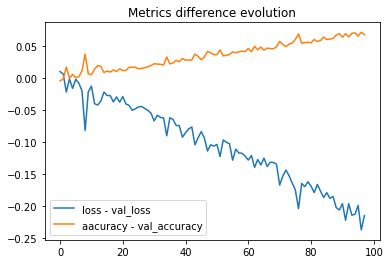

In [101]:
n = 2   # cut from starting point
plt.plot(np.array(history.__dict__['history']['loss'])[n:] - np.array(history.__dict__['history']['val_loss'])[n:],
         label = "loss - val_loss")
plt.plot(np.array(history.__dict__['history']['accuracy'])[n:] - np.array(history.__dict__['history']['val_accuracy'])[n:], 
         label = "aacuracy - val_accuracy")
plt.legend()
plt.title("Metrics difference evolution")

In [102]:
model.save("fasion.h5")

In [103]:
from tensorflow.keras.models import load_model

In [104]:
model = load_model("fasion.h5")

In [105]:
model.predict(x_test)

array([[1.6108358e-07, 3.9226737e-09, 2.8269807e-07, ..., 3.5702391e-04,
        2.6382634e-06, 9.9944192e-01],
       [2.5801862e-06, 4.1935225e-10, 9.9961299e-01, ..., 8.1527398e-12,
        1.9281256e-10, 3.1283344e-12],
       [7.3630829e-08, 9.9999988e-01, 3.1130518e-10, ..., 1.7667301e-10,
        7.5132550e-10, 2.5073470e-12],
       ...,
       [1.5304744e-04, 3.5774459e-08, 4.2084717e-05, ..., 2.3654700e-06,
        9.9973565e-01, 8.3821766e-10],
       [1.0613971e-06, 9.9998736e-01, 1.7902522e-07, ..., 2.0002537e-08,
        3.1761527e-08, 9.8088684e-09],
       [8.7832825e-07, 1.8068874e-07, 1.8513875e-06, ..., 1.4320872e-03,
        8.0179307e-06, 6.6725347e-06]], dtype=float32)